<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/TP_Binomiale_Poisson_corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch16 - Notebook : Lois Discrètes : Corrigé du TP "Approximation d'une loi binomiale par une loi de Poisson"**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **1. principe du premier algorithme : un tirage aléatoire selon la loi binomiale B(N,p)**

On répète N tirages de Bernoulli, basés sur le principe : "on tire un nombre au hasard entre 0 et 1, s'il est inférieur à p, c'est un succès", et on comptabilise les succès

## **2. Tableur**
### **Formules**

 * Si X suit une loi B(n,p), $E(X) = np$ et $X(X) = npq$, où $q = 1-p$

 * Si Y suit une loi de Poisson de paramètre $\lambda$, $E(Y) = \lambda$ et $V(Y) = \lambda$

L'écart-type, racine carrée de la variance, permet de mesurer la dispersion d'une variable aléatoire autour de son espérance.

### **Comparaison binomiale / Poisson**

Si l'on veut comparer une loi binomiale et une loi de Poisson de même espérance, il faut que celle-ci ait pour paramètre : $\lambda = n p$

On constate que plus p est faible (p étant la probabilité de succès dans la loi binomiale), mieux la loi de Poisson de paramètre $\lambda = n p$ a tendance a bien correspondre à a loi binomiale.
Il en est de même dès que n est assez grand.

C'est pour cela que la loi de Poisson est surnommée "loi des événements rares", car quand p est faible, on a de plus rares succès dans nos tirages de Bernoulli.

## **3. Traitement dans Python**



### **Simuler une loi binomiale B(n,p)**

On va utiliser la fonction 

        binomial(n,p,N) 

de *Numpy.random*

In [45]:
import numpy.random as rd
n=10
p=0.7
N = 20
X = rd.binomial(n,p,N)
X

array([ 5,  7,  6,  8,  7,  7,  9,  8,  6,  7,  8,  8,  6,  8,  6,  8,  7,
        6, 10, 10])

In [46]:
# Univers-image
X_Omega = [k for k in range(n+1)]   # en abscisses, l'univers image : [[0, n]] pour une loi binomiale
                                    # défini ici par une liste par compréhension
X_Omega

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### **Tabuler**

Commençons par écrire une fonction qui va compter la fréquence d'apparitions (nombre d'apparitions / taille del'échantillon) de chaque valeurs dans l'échantillon obtenu plus haut...

In [47]:
def tabuler(X_Omega, echantillon):
    '''Fonction qui reçoit l'univers-image et un échantillon expérimental
    et calcule liste des fréquences d'apparition de chaque valeur dans l'échantillon'''

    card = len(X_Omega)     #nombre de valeurs dans l'univers-image
    frequences = [0]*card   # on crée une liste vide, prête à recevoir les fréquences

    for k in echantillon :  # on passe en revue toutes les valeurs dans l'échantillon
        if k <= X_Omega[-1]:    # pour certaines lois à univers infini, on prend cette précaution
            frequences[k-X_Omega[0]] = frequences[k-X_Omega[0]] + 1/N
                                # on augmente la fréquence de la valeur trouvée
    
    #print(frequences)
    return(frequences)

In [48]:
frequences = tabuler(X_Omega,X)
frequences

[0, 0, 0, 0, 0, 0.05, 0.25, 0.25, 0.3, 0.05, 0.1]

### **Tracer**

In [49]:
def diagramme_batons(X_Omega,tabule):
    '''Fonction qui reçoit un univers-image et la liste tabulée des fréquences
    et qui trace le diagramme en bâtons correspondant'''
    
    # tracer les diagrammes en bâtons
    plt.grid(True)  # affichage de la grille
    largeur = (X_Omega[-1] - X_Omega[0])/100    # on élargit un peu l'intervalle d'affichage, par souci d'esthétique

    plt.bar(X_Omega, tabule, width = largeur, color = 'red', alpha = 1, label = 'Simulation')
    # La commande bar, de matplotlib.pyplot est exigible dans le programme d'ECG
    # mais rien n'est à retenir pour la mise en forme du graphique (axes, titres, etc.)

    plt.xlabel('X_Omega')       # nom de l'axe des abscisses
    plt.ylabel('Frequences')    # nom de l'axe des ordonnées
    plt.legend()

    ax = plt.gca()              # récupération du paramétrage des axes

    ax.spines['left'].set_position('zero')      # positionnement de l'axe des ordonnées à x = 0
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')    # positionnement de l'axe des abscisses à y = 0
    ax.spines['top'].set_color('none')

Text(0.5, 1.0, 'Simulation de 20 tirages selon une loi B(10 , 0.7)')

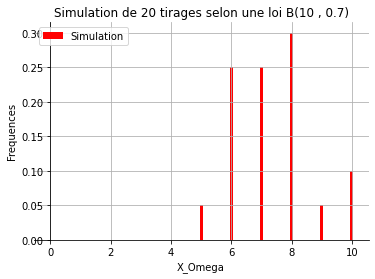

In [50]:
import matplotlib.pyplot as plt
# diagramme en bâtons loi Binomiale

# tabulation de la simulation
frequences = tabuler(X_Omega,X)

#représentation
diagramme_batons(X_Omega, frequences)

plt.title('Simulation de '+ str(N)+' tirages selon une loi B('+str(n)+' , '+ str(p)+')')

### **Loi de Poisson théorique**

Rappelons que si Y suit une loi de Poisson de paramètre $\lambda$, on a : 
$ X(\Omega) = [[ 0, + \infty[[$ et $\forall k \in X(\Omega), P([X=k]) = \dfrac{\lambda ^k}{k!} e^{-\lambda}$

In [51]:
def factorielle(k) :
    f = 1
    for i in range(1,k+1):
        f = f*i
    return f

In [52]:
factorielle(5)

120

In [53]:
def proba_Poisson(lam,k) :
    from math import exp
    P = lam**k / factorielle(k) * exp(-lam)
    return P

In [54]:
proba_Poisson(1,1) # réponse attendue : 1/e

0.36787944117144233

**calcul de la loi de Y, limitée à $X(\Omega)$**

In [55]:
lamb = n*p
loi = [proba_Poisson(lamb,k) for k in X_Omega]
loi

[0.0009118819655545162,
 0.006383173758881614,
 0.022341108156085646,
 0.052129252364199845,
 0.09122619163734973,
 0.12771666829228961,
 0.1490027796743379,
 0.1490027796743379,
 0.13037743221504566,
 0.10140466950059106,
 0.07098326865041375]

**reprise du graphique avec ajout de la loi de Poisson**

In [56]:
def diagramme_batons(X_Omega,tabule,probabilites):
    # tracer les diagrammes en bâtons
    plt.grid(True)
    largeur = (X_Omega[-1] - X_Omega[0])/100

    
    plt.bar(X_Omega, tabule, width = largeur, color = 'red', alpha = 1, label = 'Simulation de loi binomiale')
    plt.bar(X_Omega, probabilites, width = 3*largeur, color = 'blue', alpha = 0.3, label = 'Loi de Poisson exacte')

    plt.xlabel('X_Omega')
    plt.ylabel('Frequences')
    plt.legend()

    ax = plt.gca() # récupération du paramétrage des axes

    ax.spines['left'].set_position('zero') # positionnement de l'axe des ordonnées à x = 0
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero') # positionnement de l'axe des abscisses à y = 0
    ax.spines['top'].set_color('none')

Text(0.5, 1.0, 'Simulation de 20 tirages selon une loi B(10 , 0.7)')

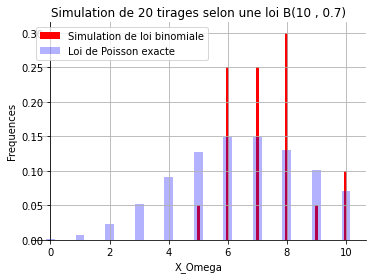

In [57]:
diagramme_batons(X_Omega, frequences, loi)

plt.title('Simulation de '+ str(N)+' tirages selon une loi B('+str(n)+' , '+ str(p)+')')

**essai avec p petit**


In [58]:
n=50
p=0.05
N = 20
X = rd.binomial(n,p,N)
X

array([2, 2, 2, 1, 2, 5, 2, 3, 1, 5, 3, 3, 1, 1, 3, 2, 1, 2, 4, 3])

In [59]:
# Univers-image
X_Omega = [k for k in range(n+1)]   # en abscisses, l'univers image : [[0, n]] pour une loi binomiale
                                    # défini ici par une liste par compréhension
#X_Omega

In [60]:
frequences = tabuler(X_Omega,X)
#frequences

In [61]:
lamb = n*p
loi = [proba_Poisson(lamb,k) for k in X_Omega]
#loi

Text(0.5, 1.0, 'Simulation de 20 tirages selon une loi B(50 , 0.05)')

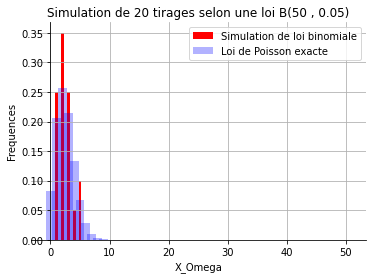

In [62]:
diagramme_batons(X_Omega, frequences, loi)

plt.title('Simulation de '+ str(N)+' tirages selon une loi B('+str(n)+' , '+ str(p)+')')
